In [16]:
import matplotlib.pyplot as plt
import librosa 
import numpy as np
from scipy import fftpack
%matplotlib inline

In [17]:
y, sr = librosa.load('20_ml.wav', sr=None)
#y, sr = librosa.load('fake.wav')
print('Sampling rate = ',sr)

Sampling rate =  44100


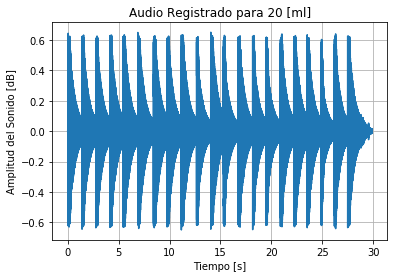

In [18]:
plt.plot(np.arange(len(y))/sr,y)
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud del Sonido [dB]')
plt.grid()
plt.title("Audio Registrado para 20 [ml]")
plt.savefig("datosiniciales.pdf")
plt.show()

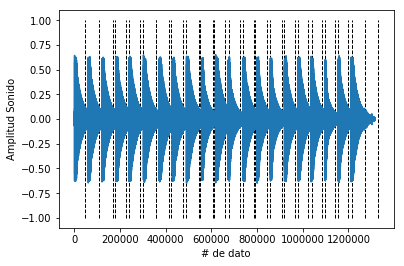

In [21]:
desp_izq_s = 0.3# desplazamiento a la izquierda del segmento, respecto al peak, en segundos
desp_izq_n = np.int(sr*desp_izq_s) # lo mismo, pero en puntos de la señal
ancho_s = 3. # ancho del segmento a extraer, en segundos
ancho_n = np.int(sr*ancho_s) # ancho en puntos de la señal
posiciones_sobre_umbral = np.where(np.abs(y)/np.max(np.abs(y))>0.9)
posiciones_sobre_umbral = np.insert(posiciones_sobre_umbral,0,0)
posicion_peaks = posiciones_sobre_umbral[1+np.where(np.diff(posiciones_sobre_umbral)>6000)[0]]
plt.vlines(posicion_peaks-desp_izq_n, -1,1,linestyles='dashed', linewidth=1)
plt.vlines(posicion_peaks-desp_izq_n+ancho_n, -1,1, linestyles='dashed', linewidth=1)
plt.plot(y)
plt.xlabel('# de dato')
plt.ylabel('Amplitud Sonido')
plt.show()

In [22]:
pulsos = []
for p in posicion_peaks:
    pulsos.append(y[p-desp_izq_n:p-desp_izq_n+ancho_n])
print("Detectados", len(pulsos), "pulsos")

Detectados 20 pulsos


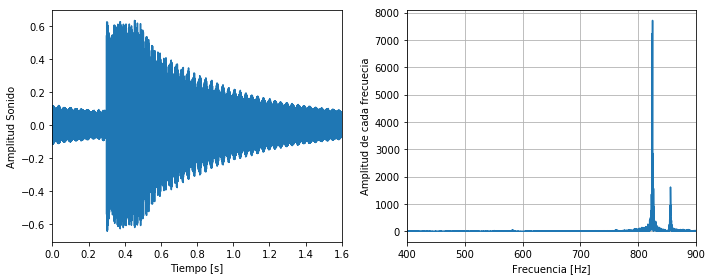

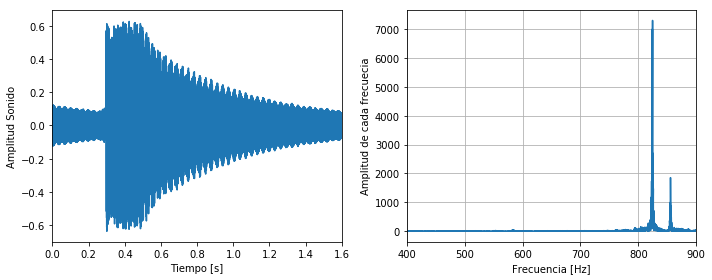

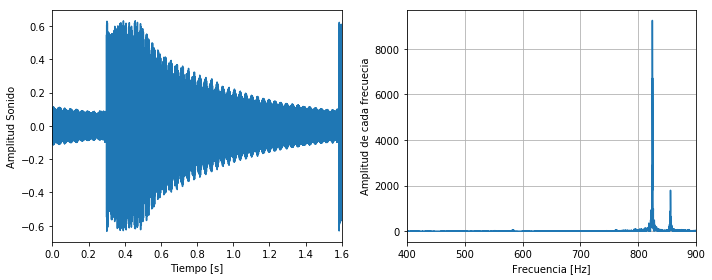

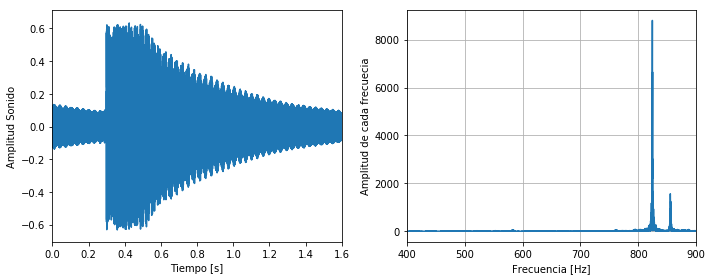

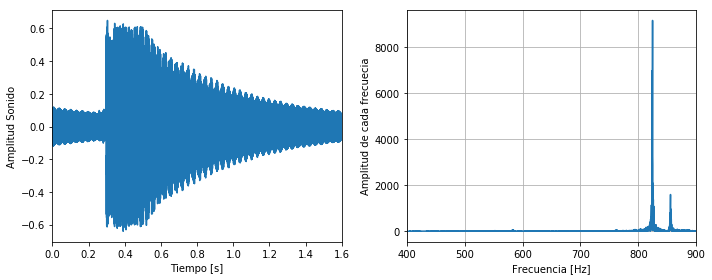

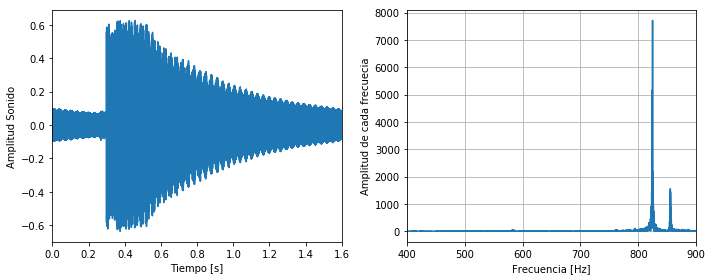

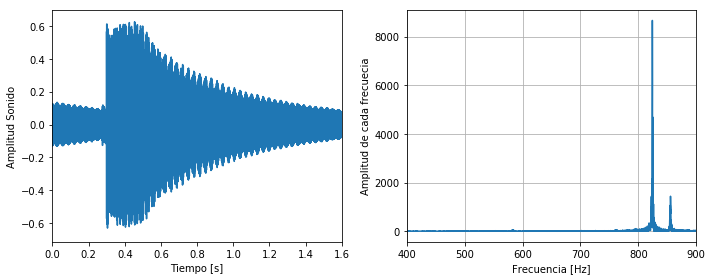

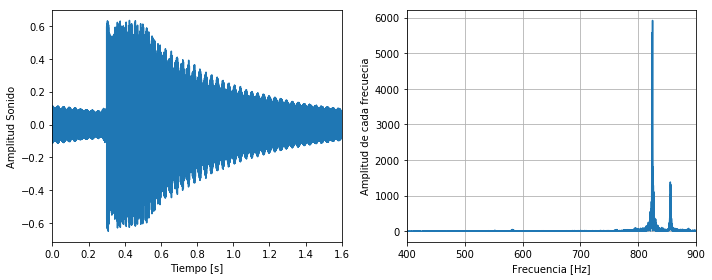

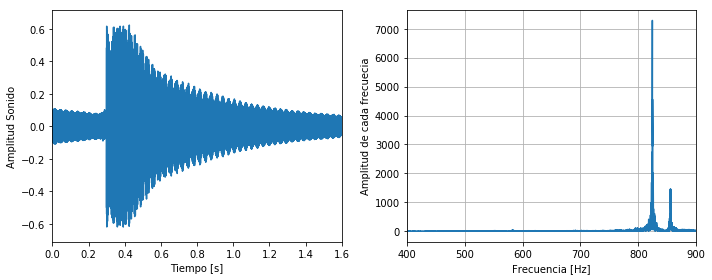

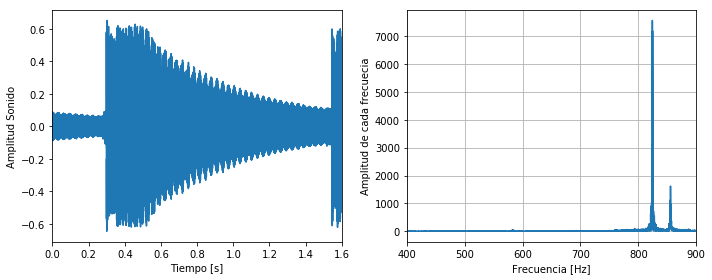

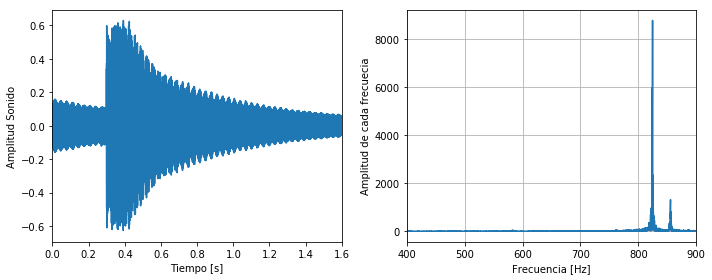

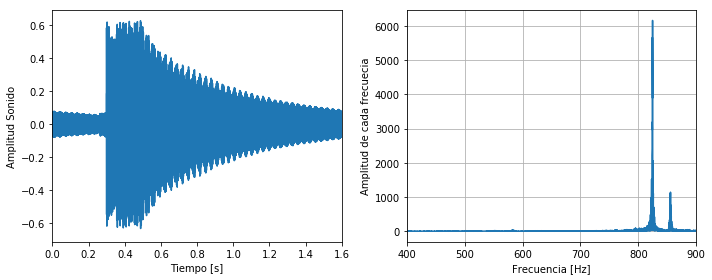

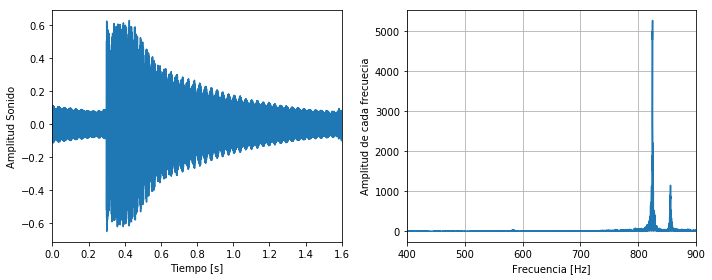

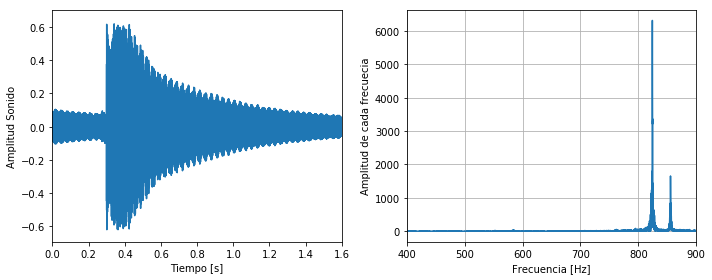

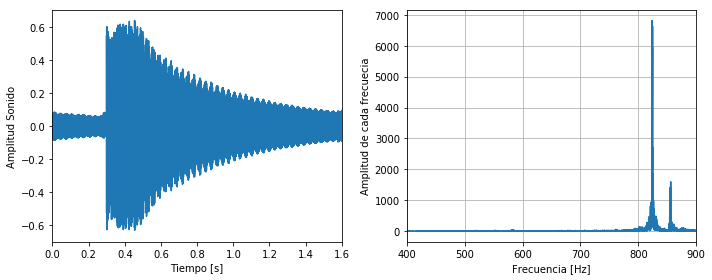

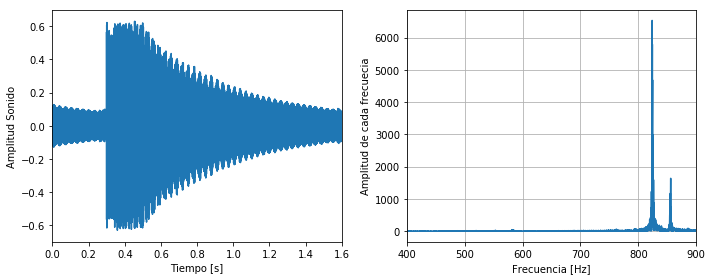

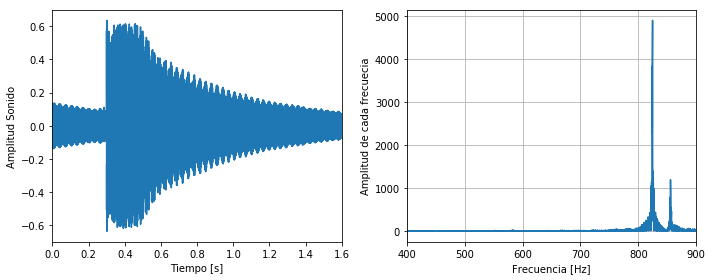

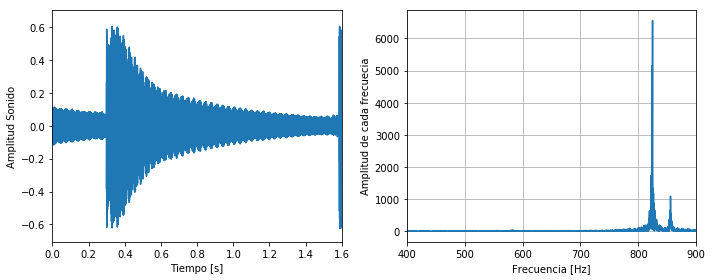

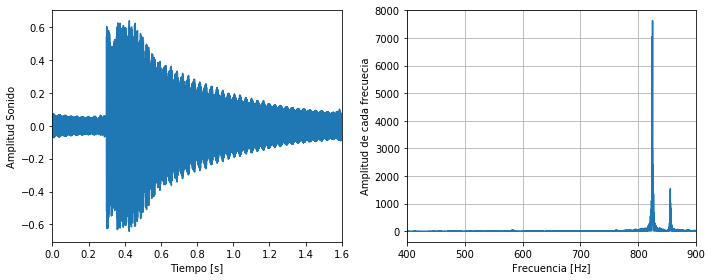

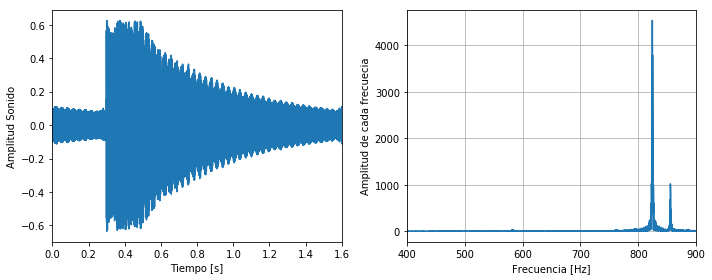

In [26]:
for n_p,p in enumerate(pulsos):
# Primera gráfica   
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.plot(np.arange(len(p))/sr,p)
    plt.xlim(0, 1.6) # agregado por nosotros
    plt.xlabel('Tiempo [s]')
    plt.ylabel('Amplitud Sonido')
    fs = fftpack.rfftfreq(p.size, d=1/sr)
    absfft = np.abs(fftpack.rfft(p))
    plt.subplot(1,2,2)
# segunda gráfica 
    plt.plot(fs,absfft)
    plt.xlim(400,900)
    plt.xlabel('Frecuencia [Hz]')
    plt.ylabel('Amplitud de cada frecuecia')
    plt.grid()
    plt.tight_layout()
    plt.savefig('pulso-%03d.pdf')

In [24]:
fmaxs = []
for (n_p,p) in enumerate(pulsos):    
    fs = fftpack.rfftfreq(p.size, d=1/sr)
    absfft = np.abs(fftpack.rfft(p))
    f_max = fs[np.argmax(absfft)]
    print("Pulso", n_p+1, ': f_max =',f_max, 'Hz') #mariana
    fmaxs = np.append(fmaxs,f_max)

fmean = np.mean(fmaxs)
fstd = np.std(fmaxs, ddof=1)
print("El promedio de pulsos es:", fmean, "y su desviación estándar es:", fstd) 

Pulso 1 : f_max = 824.6666666666666 Hz
Pulso 2 : f_max = 824.6666666666666 Hz
Pulso 3 : f_max = 824.3333333333334 Hz
Pulso 4 : f_max = 824.3333333333334 Hz
Pulso 5 : f_max = 824.6666666666666 Hz
Pulso 6 : f_max = 824.6666666666666 Hz
Pulso 7 : f_max = 824.3333333333334 Hz
Pulso 8 : f_max = 824.6666666666666 Hz
Pulso 9 : f_max = 824.3333333333334 Hz
Pulso 10 : f_max = 824.3333333333334 Hz
Pulso 11 : f_max = 824.6666666666666 Hz
Pulso 12 : f_max = 824.6666666666666 Hz
Pulso 13 : f_max = 824.6666666666666 Hz
Pulso 14 : f_max = 824.3333333333334 Hz
Pulso 15 : f_max = 824.0 Hz
Pulso 16 : f_max = 824.0 Hz
Pulso 17 : f_max = 824.6666666666666 Hz
Pulso 18 : f_max = 824.6666666666666 Hz
Pulso 19 : f_max = 824.6666666666666 Hz
Pulso 20 : f_max = 824.2747422289293 Hz
El promedio de pulsos es: 824.480403778113 y su desviación estándar es: 0.23116217221556445
